# El problema de la mochila

Se tiene una mochila y un conjunto de artículos con diferente peso y valor. Se intenta determinar que artículos se pueden colocar adentro de la mochila de manera que no se sobrepase el límite de peso de la mochila maximizando el valor total. 

Resolver el problema agregando heurística para los siguientes artículos y un límite de 30kg:

<table style="font-size:16px">
    <tr>
        <th>Item</th><td>Valor</td><td>Peso</td>
    </tr>
    <tr>
        <th>A</th><td>4</td><td>12</td>
    </tr>
    <tr>
        <th>B</th><td>2</td><td>2</td>
    </tr>
    <tr>
        <th>C</th><td>10</td><td>4</td>
    </tr>
    <tr>
        <th>D</th><td>1</td><td>1</td>
    </tr>
    <tr>
        <th>E</th><td>5</td><td>15</td>
    </tr>
    <tr>
        <th>F</th><td>3</td><td>2</td>
    </tr>
    <tr>
        <th>G</th><td>14</td><td>7</td>
    </tr>
    <tr>
        <th>H</th><td>4</td><td>10</td>
    </tr>
</table>

## Codificación

- Definir como se codificará el problema

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?


In [1]:
import numpy
import random
import matplotlib
import matplotlib.pyplot as plt

def generar_poblacion(num_pop):
    poblacion = numpy.zeros(shape=(num_pop, 8))
    
    for i in range(0, num_pop): 
        poblacion[i] = numpy.random.permutation([i for i in range(0,8)])
    
    return poblacion.astype(int)

#equation_inputs : valores de entrada
#pop : población
def cal_pop_fitness(population):
    fitness = []
    
    items = ["A", "B", "C", "D", "E", "F", "G", "H", "Vacio"]
    valores = [4, 2, 10, 1, 5, 3, 14, 4, 0]
    pesos = [12, 2, 4, 1, 15, 2, 7, 10, 0]
    
    for pop in population:
        #penalizar ciudades repetidas
        penalizar = False
        
        kg = 0
        valor = 0
        relacion_valor_peso = 0
        i = 0
        
        #se recorren los items
        for item2 in range(len(pop)-1):
            #se suman las relaciones valor peso
            kg = kg + pesos[pop[i]]
            valor = valor + valores[pop[i]]
            i= i + 1
        
        relacion_valor_peso = valor / kg
        
        #aplicar la inversa (adaptacion)
        adaptacion= 1 / relacion_valor_peso  
        
        if len(pop) != len(set(pop)) or kg > 30:
            adaptacion = adaptacion * -9999999 
            
        fitness.append(adaptacion)
    
    return fitness


## Selección

In [2]:

#pop: población
#fitness: arreglo con los valores de adaptación
#num_parent: cantidad de padres que se quieren obtener
def select_mating_pool(pop, fitness, num_parents):
    ranking = [0] * len(fitness)
    prob = []
    
    for rank in range(len(fitness), 0, -1):
        #indice de mayor valor
        ranking[fitness.index(max(fitness))] = rank
        fitness[fitness.index(max(fitness))] = -99999999
    
    for i in range(0, len(ranking)):
        prob.append(ranking[i] / (len(ranking) * (len(ranking) - 1 )))
    
    prob = numpy.array(prob)
    
    prob /= prob.sum()
        
    parents = numpy.random.choice(pop.shape[0], size = num_parents,  p = prob)
    
    lista = [pop[indice] for indice in parents]
    
    return lista

## Cruza

In [3]:
def arreglar_gen(hijo):
    if len(hijo) != len(set(hijo)):
        hijo = list(set(hijo))
        res = list(set([i for i in range(1,11)]) - set(hijo))
        for i in res:
            hijo.append(i)
    return hijo

#parents: lista de padres
#offspring_size: cantidad de hijos que se quieren obtener
def crossover(parents, offspring_size):    
    
    lista = [2, 3, 4, 5, 6, 7]
    offspring1 = []
    offspring2 = []
    
    #Generar arreglo vacío donde se guardarán los hijos
    offspring = []
    
    #Definir punto de cruce en la mitad de los padre 
    crossover_point = numpy.sort(numpy.array(random.sample(lista, 2)))
    
    for k in range(0, offspring_size, 2):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar la primera parte del primer hijo
        offspring1[0:crossover_point[0]] = parents[parent1_idx, 0:crossover_point[0]]
        # Generar la segunda parte del primer hijo
        offspring1[crossover_point[0]:] = parents[parent2_idx, crossover_point[0]:crossover_point[1]]
        # Generar la tercera parte del primer hijo
        offspring1[crossover_point[1]:] = parents[parent1_idx, crossover_point[1]:]
        # Generar la primera parte del segundo hijo
        offspring2[0:crossover_point[0]] = parents[parent2_idx, 0:crossover_point[0]]
        # Generar la segunda parte del segundo hijo
        offspring2[crossover_point[0]:] = parents[parent1_idx, crossover_point[0]:crossover_point[1]]
        # Generar la tercera parte del segundo hijo
        offspring2[crossover_point[1]:] = parents[parent2_idx, crossover_point[1]:]
        
        offspring.append(offspring1)
        offspring.append(offspring2)
    
    #Devolver lista de hijos
    return offspring

## Mutación

In [4]:
#offspring_crossover: lista de hijos a mutar
def mutation(offspring_crossover):
    #print("Offspring Crossover: ", offspring_crossover)
    listapos = [i for i in range(0,len(offspring_crossover[0]))]
    
    for idx in range(len(offspring_crossover)):
        replacepos = random.sample(listapos, 2)
        
        # Reemplazar el valor de dos genes por dos valores aleatorios
        aux = offspring_crossover[idx][min(replacepos)] 
        offspring_crossover[idx][min(replacepos)] = offspring_crossover[idx][max(replacepos)]
        offspring_crossover[idx][max(replacepos)] = aux
    
    #Devolver lista de hijos mutados
    return offspring_crossover

# Algoritmo

In [5]:
#Cantidad de genes
num_genes = 10
#Soluciones por población
sol_per_pop = 200
#Número de padres para cruza
num_parents_mating = 20
#Tamaño de la población
pop_size = (sol_per_pop, num_genes)
#Crear pobliación inicial con valores aleatorios
new_population = generar_poblacion(sol_per_pop)
#Cantidad de generaciones a realizar
num_generations = 200

-9999999.0
0
-9038460.634615384
1
-6874999.3125
2
-6874999.3125
3
-6874999.3125
4
-6874999.3125
5
-6874999.3125
6
-8863635.477272727
7
-8863635.477272727
8
-6904761.214285715
9
-5128204.615384616
10
-4999999.5
11
-4999999.5
12
-4901960.294117647
13
-4901960.294117647
14
-4901960.294117647
15
-4901960.294117647
16
-4901960.294117647
17
-4843749.515625
18
-4843749.515625
19
-4843749.515625
20
-4901960.294117647
21
-4901960.294117647
22
-4843749.515625
23
-4843749.515625
24
-4666666.2
25
-4666666.2
26
-4492753.173913044
27
-4307691.876923077
28
-4307691.876923077
29
-4307691.876923077
30
-4098360.2459016396
31
-4098360.2459016396
32
-4098360.2459016396
33
-3999999.6
34
-3999999.6
35
-3999999.6
36
-3999999.6
37
-3999999.6
38
-3999999.6
39
-3999999.6
40
-3999999.6
41
-3999999.6
42
-3999999.6
43
-3999999.6
44
-3999999.6
45
-3999999.6
46
-3999999.6
47
-3999999.6
48
-3999999.6
49
-3999999.6
50
-3999999.6
51
-3999999.6
52
-3999999.6
53
-3999999.6
54
-3999999.6
55
-3999999.6
56
-3999999.6
57
-39

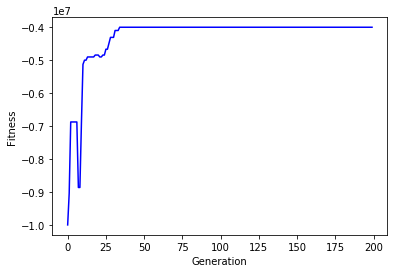

In [6]:
gen = []
fit = []
best_adaptation = -99999999
best_match = []

for generation in range(num_generations):
    # Obtener valores de adaptación de la población
    fitness = cal_pop_fitness(new_population)
    # Selección
    parents = select_mating_pool(new_population, fitness, num_parents_mating)
    
    parents = numpy.array(parents)
    
    # Cruza
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0]))
    
    # Mutación
    offspring_mutation = mutation(offspring_crossover)
    offspring_mutation = numpy.array(offspring_mutation)
    
    # Crear nueva población basada en los padres y los hijos
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # Obtener mejor resultado para la generación
    fit.append(numpy.max(cal_pop_fitness(new_population)))
    print(numpy.max(cal_pop_fitness(new_population)))
    gen.append(generation)
    print(generation)
    
    if best_adaptation < numpy.max(cal_pop_fitness(new_population)):
        best_adaptation = numpy.max(cal_pop_fitness(new_population))
        best_match_idx = numpy.where(cal_pop_fitness(new_population) == numpy.max(cal_pop_fitness(new_population)))
        best_match = new_population[best_match_idx, :]

#Obtener la mejor solución
print("Mejor resultado : ", best_match)
print("Adaptación del mejor resultado : ", best_adaptation)

#Gráfico
fig, ax = plt.subplots()
ax.plot(gen, fit, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()
